# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key as api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
#Sample json response for reference
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}"
city_url = f'{url}&q=Oslo'
resp = requests.get(city_url).json()
pprint(resp)

{'base': 'stations',
 'clouds': {'all': 37},
 'cod': 200,
 'coord': {'lat': 59.9127, 'lon': 10.7461},
 'dt': 1698088721,
 'id': 3143244,
 'main': {'feels_like': 278.33,
          'grnd_level': 1012,
          'humidity': 96,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 278.33,
          'temp_max': 279.65,
          'temp_min': 276.36},
 'name': 'Oslo',
 'sys': {'country': 'NO',
         'id': 237284,
         'sunrise': 1698041679,
         'sunset': 1698076071,
         'type': 2},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 40, 'gust': 0.91, 'speed': 0.94}}


In [6]:
# Set the API base URL
units = 'metric'
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        resp = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = resp['coord']['lat']
        city_lng = resp['coord']['lon']
        city_max_temp = resp['main']['temp_max']
        city_humidity = resp['main']['humidity']
        city_clouds = resp['clouds']['all']
        city_wind = resp['wind']['speed']
        city_country = resp['sys']['country']
        city_date = resp['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dudinka
Processing Record 2 of Set 1 | ust-nera
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | quellon
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | qal'ah-ye shahr
Processing Record 8 of Set 1 | saipan
Processing Record 9 of Set 1 | selfoss
Processing Record 10 of Set 1 | ouellah
City not found. Skipping...
Processing Record 11 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | ola
Processing Record 17 of Set 1 | turpan
Processing Record 18 of Set 1 | luderitz
Processing Record 19 of Set 1 | polyarnyy
Processing Record 20 of Set 1 | kone
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dudinka,69.4058,86.1778,-7.31,95,90,1.58,RU,1698088937
1,ust-nera,64.5667,143.2000,-14.55,95,90,2.56,RU,1698088937
2,albany,42.6001,-73.9662,14.46,56,10,0.89,US,1698088937
3,quellon,-43.1167,-73.6167,13.43,69,9,4.06,CL,1698088937
4,san patricio,28.0170,-97.5169,30.97,52,46,9.24,US,1698088938


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,-7.31,95,90,1.58,RU,1698088937
1,ust-nera,64.5667,143.2000,-14.55,95,90,2.56,RU,1698088937
2,albany,42.6001,-73.9662,14.46,56,10,0.89,US,1698088937
3,quellon,-43.1167,-73.6167,13.43,69,9,4.06,CL,1698088937
4,san patricio,28.0170,-97.5169,30.97,52,46,9.24,US,1698088938


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

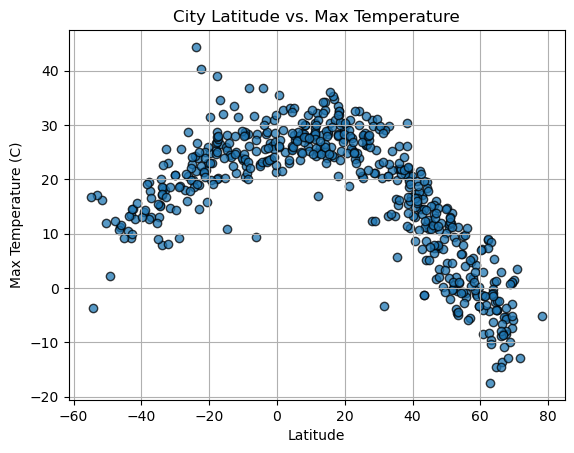

In [16]:
# Build scatter plot for latitude vs. temperature
xvals = city_data_df['Lat']
yvals = city_data_df['Max Temp']

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature')
plt.grid()

plt.scatter(xvals, yvals, alpha=0.75, marker='o', edgecolors='Black')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

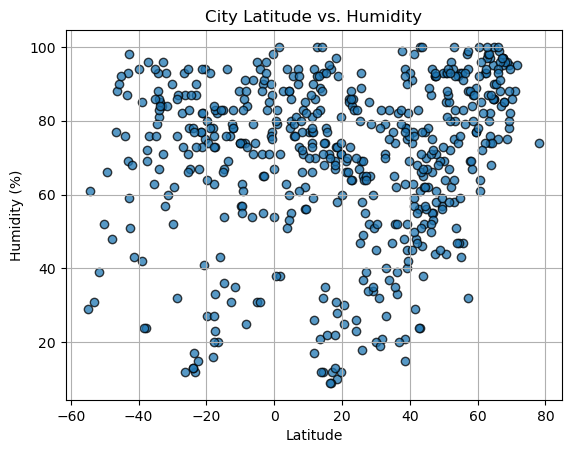

In [17]:
# Build the scatter plots for latitude vs. humidity
xvals = city_data_df['Lat']
yvals = city_data_df['Humidity']

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()

plt.scatter(xvals, yvals, alpha=0.75, marker='o', edgecolors='Black')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

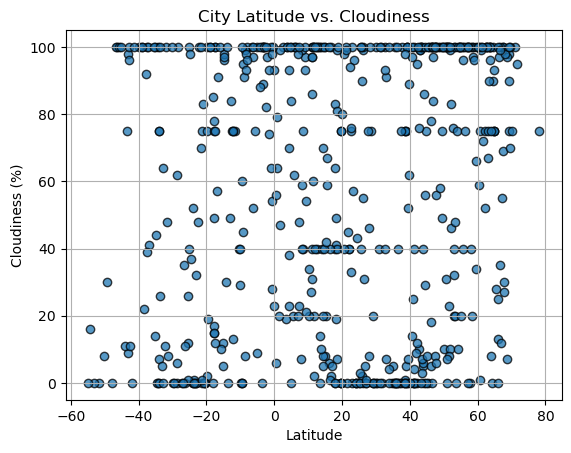

In [18]:
# Build the scatter plots for latitude vs. cloudiness
xvals = city_data_df['Lat']
yvals = city_data_df['Cloudiness']

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()

plt.scatter(xvals, yvals, alpha=0.75, marker='o', edgecolors='Black')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

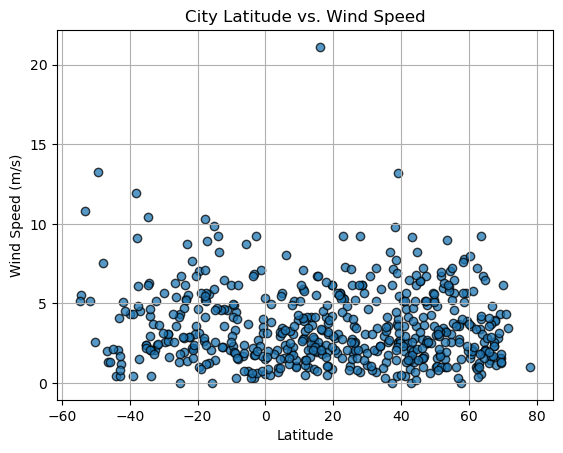

In [19]:
# Build the scatter plots for latitude vs. wind speed
xvals = city_data_df['Lat']
yvals = city_data_df['Wind Speed']

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()

plt.scatter(xvals, yvals, alpha=0.75, marker='o', edgecolors='Black')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def regressionPlot(xVals, yVals, xLabel, yLabel, title = None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xVals, yVals)
    intercept = round(intercept, 2)

    regs = (slope*xVals) + intercept
    equation = f'y = {round(slope, 2)}x + {intercept}'

    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    plt.scatter(xVals, yVals)

    plt.plot(xVals, regs, c='r')

    eqx = (abs(xVals.max()) - abs(xVals.min())) / 4
    eqy = (abs(yVals.max()) - abs(yVals.min())) / 4
    plt.text(eqx, eqy, equation)

    print(f'The r value is: {str(rvalue)}')
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,-7.31,95,90,1.58,RU,1698088937
1,ust-nera,64.5667,143.2000,-14.55,95,90,2.56,RU,1698088937
2,albany,42.6001,-73.9662,14.46,56,10,0.89,US,1698088937
4,san patricio,28.0170,-97.5169,30.97,52,46,9.24,US,1698088938
5,badger,64.8000,-147.5333,-4.07,86,75,2.06,US,1698088938


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,quellon,-43.1167,-73.6167,13.43,69,9,4.06,CL,1698088937
9,puerto ayora,-0.7393,-90.3518,30.98,87,54,4.02,EC,1698088939
12,waitangi,-43.9535,-176.5597,10.46,76,11,0.45,NZ,1698088939
15,luderitz,-26.6481,15.1594,15.98,93,35,6.25,NaN,1698088940
17,kone,-21.0595,164.8658,21.70,82,83,2.22,NC,1698088940


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8925397209154631


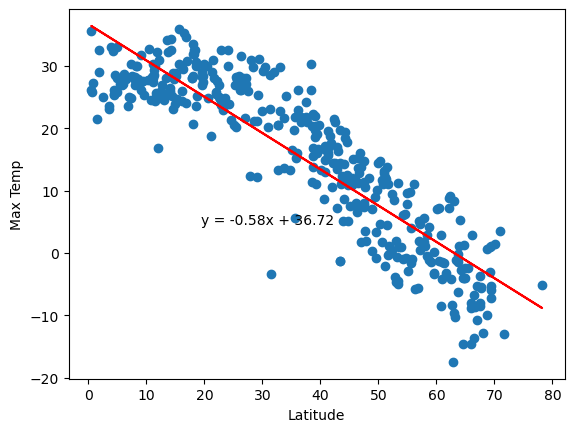

In [41]:
# Linear regression on Northern Hemisphere
xs = northern_hemi_df['Lat'].values
ys = northern_hemi_df['Max Temp'].values
regressionPlot(xs, ys, 'Latitude', 'Max Temp')

The r value is: 0.6856160091966221


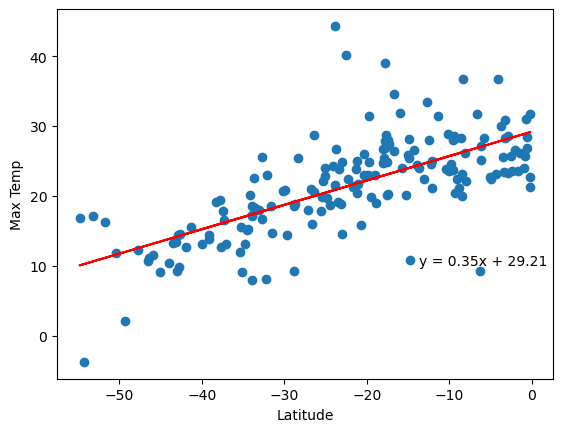

In [42]:
# Linear regression on Southern Hemisphere
xs = southern_hemi_df['Lat'].values
ys = southern_hemi_df['Max Temp'].values
regressionPlot(xs, ys, 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** There appears to be a strong correlation in both cases, which makes sense as when one goes closer to the equator (smaller Lat for northern, larger for southern), temperatures rise. This tracks with a negative correlation for the north and a positive one for the south.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.262839754546161


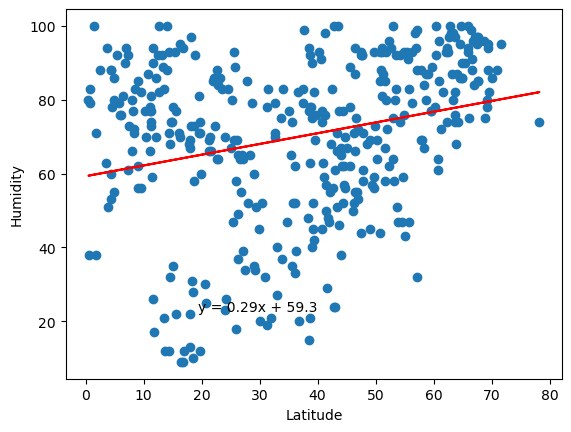

In [43]:
# Northern Hemisphere
xs = northern_hemi_df['Lat'].values
ys = northern_hemi_df['Humidity'].values
regressionPlot(xs, ys, 'Latitude', 'Humidity')

The r value is: 0.06993230867236552


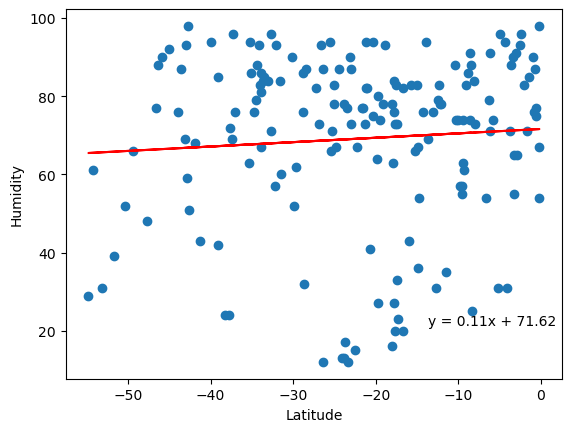

In [44]:
# Southern Hemisphere
xs = southern_hemi_df['Lat'].values
ys = southern_hemi_df['Humidity'].values
regressionPlot(xs, ys, 'Latitude', 'Humidity')

**Discussion about the linear relationship:** In both of these cases, there seems to be little correlation, which is demonstated by the r values being exceptionally low. If thse were strongly correlated, it would appear that the south pole had zero humidity, while the north pole had a very high humidity. This leads me to believe that humidity is more influenced by local geography rather than position on the globe.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.1600248486063887


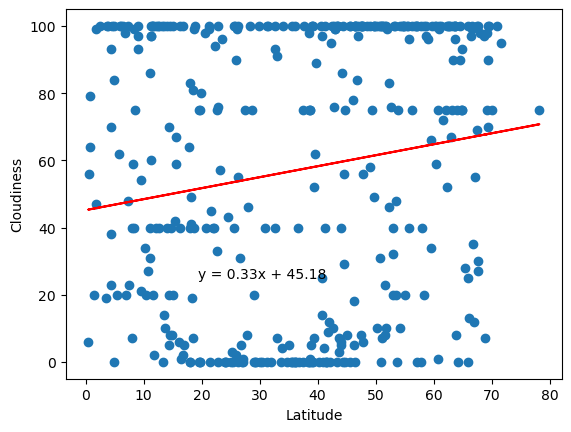

In [45]:
# Northern Hemisphere
xs = northern_hemi_df['Lat'].values
ys = northern_hemi_df['Cloudiness'].values
regressionPlot(xs, ys, 'Latitude', 'Cloudiness')

The r value is: 0.2310841688412218


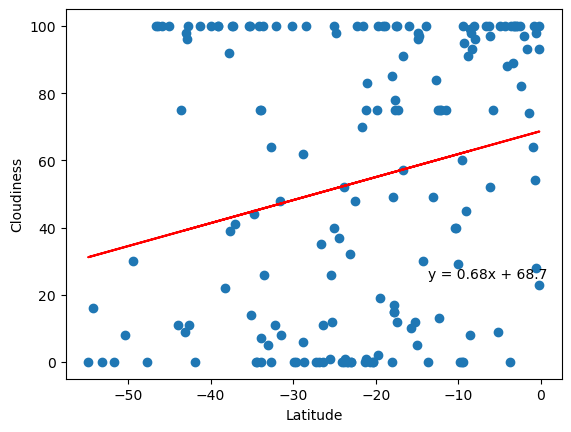

In [46]:
# Southern Hemisphere
xs = southern_hemi_df['Lat'].values
ys = southern_hemi_df['Cloudiness'].values
regressionPlot(xs, ys, 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** In a similar veign as humidity, there appears to be little correlation between cloudiness and latitude. Both are positive yet again, but it seems that the 'stronger' r value for the norther hemisphere may be due to a larger subset of data in comparison to the southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.0058392229571603334


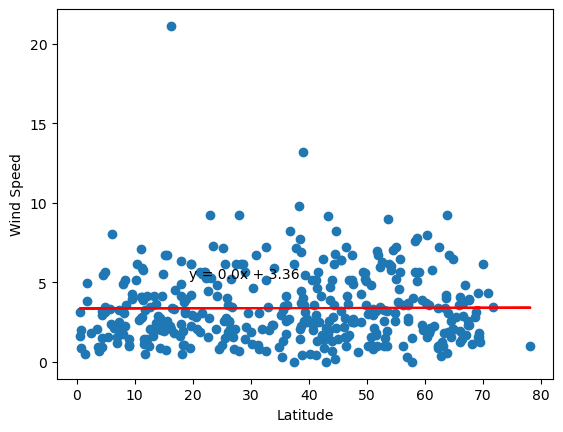

In [47]:
# Northern Hemisphere
xs = northern_hemi_df['Lat'].values
ys = northern_hemi_df['Wind Speed'].values
regressionPlot(xs, ys, 'Latitude', 'Wind Speed')

The r value is: -0.11892312053959297


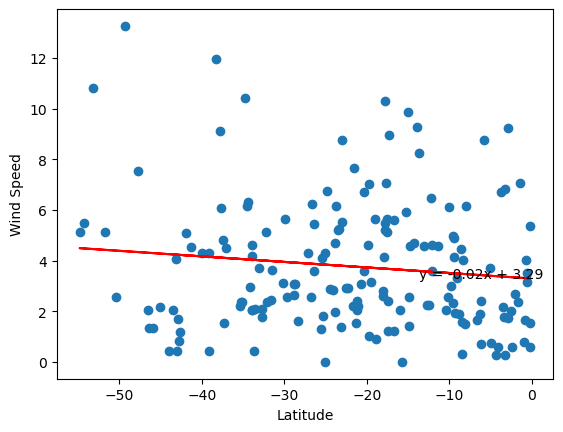

In [48]:
# Southern Hemisphere
xs = southern_hemi_df['Lat'].values
ys = southern_hemi_df['Wind Speed'].values
regressionPlot(xs, ys, 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** In both cases, it looks to be that wind speed is fairly constant, albeit with a weak correlation still appearing. If we look instead at the number of points below a certain value (i.e. 10), we can see that most of the data is below that point. A different method of analysis may yield a better result.